In [1]:
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [2]:
hot_songs=pd.read_csv('hot_songs_final.csv')
hot_songs

,Unnamed: 0,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,set
0,0,Anti-Hero,Taylor Swift,0.637,0.643,4,-6.571,1,0.0519,0.13000,...,0.5330,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,H
1,1,Lift Me Up,Rihanna,0.247,0.299,9,-6.083,1,0.0315,0.89900,...,0.1720,177.115,audio_features,35ovElsgyAtQwYPYnZJECg,spotify:track:35ovElsgyAtQwYPYnZJECg,https://api.spotify.com/v1/tracks/35ovElsgyAtQ...,https://api.spotify.com/v1/audio-analysis/35ov...,196520,4,H
2,2,Bad Habit,Steve Lacy,0.686,0.507,1,-7.097,1,0.0357,0.62600,...,0.6900,168.955,audio_features,5CM4UuQ9Gnd6K2YyKGPMoK,spotify:track:5CM4UuQ9Gnd6K2YyKGPMoK,https://api.spotify.com/v1/tracks/5CM4UuQ9Gnd6...,https://api.spotify.com/v1/audio-analysis/5CM4...,232115,4,H
3,3,As It Was,Harry Styles,0.520,0.731,6,-5.338,0,0.0557,0.34200,...,0.6620,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4,H
4,4,Lavender Haze,Taylor Swift,0.733,0.436,10,-10.489,1,0.0800,0.25800,...,0.0976,96.985,audio_features,5jQI2r1RdgtuT8S3iG8zFC,spotify:track:5jQI2r1RdgtuT8S3iG8zFC,https://api.spotify.com/v1/tracks/5jQI2r1Rdgtu...,https://api.spotify.com/v1/audio-analysis/5jQI...,202396,4,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,Betty (Get Money),Yung Gravy,0.723,0.772,1,-6.784,1,0.0792,0.00524,...,0.5800,102.004,audio_features,4cacyP5c3PMlfnyjpg13xW,spotify:track:4cacyP5c3PMlfnyjpg13xW,https://api.spotify.com/v1/tracks/4cacyP5c3PMl...,https://api.spotify.com/v1/audio-analysis/4cac...,146471,4,H
71,71,300 Blackout,Kodak Black,0.669,0.741,0,-6.545,0,0.3160,0.01980,...,0.3960,167.903,audio_features,3y3NwQPQAjKCunRz2eKggA,spotify:track:3y3NwQPQAjKCunRz2eKggA,https://api.spotify.com/v1/tracks/3y3NwQPQAjKC...,https://api.spotify.com/v1/audio-analysis/3y3N...,166494,4,H
72,72,Dear Reader,Taylor Swift,0.562,0.388,0,-12.088,1,0.0705,0.48100,...,0.1590,107.747,audio_features,3QF5RsWzK1lCvf2o2cY65P,spotify:track:3QF5RsWzK1lCvf2o2cY65P,https://api.spotify.com/v1/tracks/3QF5RsWzK1lC...,https://api.spotify.com/v1/audio-analysis/3QF5...,225194,4,H
73,73,Country On,Luke Bryan,0.520,0.751,5,-5.064,1,0.0551,0.17100,...,0.5190,156.044,audio_features,1tRxwf8Q0AcshfHuaD86Yt,spotify:track:1tRxwf8Q0AcshfHuaD86Yt,https://api.spotify.com/v1/tracks/1tRxwf8Q0Acs...,https://api.spotify.com/v1/audio-analysis/1tRx...,236456,4,H


In [4]:
not_hot_songs=pd.read_csv('not_hot_songs_final.csv')
not_hot_songs

,Unnamed: 0,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,set
0,0,Like a Rolling Stone,Bob Dylan,0.482,0.721,0,-6.839,1,0.0321,0.73100,...,0.557,95.263,audio_features,3AhXZa8sUQht0UEdBJgpGc,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4,N
1,1,(I Can't Get No) Satisfaction',The Rolling Stones,0.723,0.863,2,-7.890,1,0.0338,0.03830,...,0.931,136.302,audio_features,2PzU4IB8Dr6mxV3lHuaG34,spotify:track:2PzU4IB8Dr6mxV3lHuaG34,https://api.spotify.com/v1/tracks/2PzU4IB8Dr6m...,https://api.spotify.com/v1/audio-analysis/2PzU...,222813,4,N
2,2,Imagine,John Lennon,0.547,0.257,0,-12.358,1,0.0252,0.90700,...,0.169,75.752,audio_features,7pKfPomDEeI4TPT6EOYjn9,spotify:track:7pKfPomDEeI4TPT6EOYjn9,https://api.spotify.com/v1/tracks/7pKfPomDEeI4...,https://api.spotify.com/v1/audio-analysis/7pKf...,187867,4,N
3,3,What's Going On,Marvin Gaye,0.283,0.716,1,-9.632,0,0.0986,0.44700,...,0.828,201.960,audio_features,3Um9toULmYFGCpvaIPFw7l,spotify:track:3Um9toULmYFGCpvaIPFw7l,https://api.spotify.com/v1/tracks/3Um9toULmYFG...,https://api.spotify.com/v1/audio-analysis/3Um9...,233000,4,N
4,4,Respect,Aretha Franklin,0.805,0.558,0,-5.226,1,0.0410,0.16400,...,0.965,114.950,audio_features,7s25THrKz86DM225dOYwnr,spotify:track:7s25THrKz86DM225dOYwnr,https://api.spotify.com/v1/tracks/7s25THrKz86D...,https://api.spotify.com/v1/audio-analysis/7s25...,147600,4,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,480,Heroin,The Velvet Underground,0.201,0.777,1,-10.167,1,0.0705,0.30400,...,0.235,145.733,audio_features,5by3w3NXvwDpV9FBSOR35u,spotify:track:5by3w3NXvwDpV9FBSOR35u,https://api.spotify.com/v1/tracks/5by3w3NXvwDp...,https://api.spotify.com/v1/audio-analysis/5by3...,433573,4,N
481,481,Leader of the Pack,The Shangri-Las,0.417,0.546,0,-8.710,1,0.0858,0.72500,...,0.310,126.224,audio_features,6wzLLGFlWQ5jqTL13MU069,spotify:track:6wzLLGFlWQ5jqTL13MU069,https://api.spotify.com/v1/tracks/6wzLLGFlWQ5j...,https://api.spotify.com/v1/audio-analysis/6wzL...,173533,4,N
482,482,Pressure Drop,Toots and the Maytals,0.653,0.459,8,-12.180,1,0.0369,0.60300,...,0.986,146.296,audio_features,2EISedV2npKMtvygkykV2r,spotify:track:2EISedV2npKMtvygkykV2r,https://api.spotify.com/v1/tracks/2EISedV2npKM...,https://api.spotify.com/v1/audio-analysis/2EIS...,176693,4,N
483,483,Come As You Are,Nirvana,0.500,0.824,4,-5.846,0,0.0388,0.00016,...,0.539,120.125,audio_features,4P5KoWXOxwuobLmHXLMobV,spotify:track:4P5KoWXOxwuobLmHXLMobV,https://api.spotify.com/v1/tracks/4P5KoWXOxwuo...,https://api.spotify.com/v1/audio-analysis/4P5K...,218920,4,N


In [5]:
whole_set = pd.concat([not_hot_songs, hot_songs], axis=0) 
display(whole_set.iloc[0:45,:])
        
        

,Unnamed: 0,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,set
0,0,Like a Rolling Stone,Bob Dylan,0.482,0.7210,0,-6.839,1,0.0321,0.731000,...,0.557,95.263,audio_features,3AhXZa8sUQht0UEdBJgpGc,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4,N
1,1,(I Can't Get No) Satisfaction',The Rolling Stones,0.723,0.8630,2,-7.890,1,0.0338,0.038300,...,0.931,136.302,audio_features,2PzU4IB8Dr6mxV3lHuaG34,spotify:track:2PzU4IB8Dr6mxV3lHuaG34,https://api.spotify.com/v1/tracks/2PzU4IB8Dr6m...,https://api.spotify.com/v1/audio-analysis/2PzU...,222813,4,N
2,2,Imagine,John Lennon,0.547,0.2570,0,-12.358,1,0.0252,0.907000,...,0.169,75.752,audio_features,7pKfPomDEeI4TPT6EOYjn9,spotify:track:7pKfPomDEeI4TPT6EOYjn9,https://api.spotify.com/v1/tracks/7pKfPomDEeI4...,https://api.spotify.com/v1/audio-analysis/7pKf...,187867,4,N
3,3,What's Going On,Marvin Gaye,0.283,0.7160,1,-9.632,0,0.0986,0.447000,...,0.828,201.960,audio_features,3Um9toULmYFGCpvaIPFw7l,spotify:track:3Um9toULmYFGCpvaIPFw7l,https://api.spotify.com/v1/tracks/3Um9toULmYFG...,https://api.spotify.com/v1/audio-analysis/3Um9...,233000,4,N
4,4,Respect,Aretha Franklin,0.805,0.5580,0,-5.226,1,0.0410,0.164000,...,0.965,114.950,audio_features,7s25THrKz86DM225dOYwnr,spotify:track:7s25THrKz86DM225dOYwnr,https://api.spotify.com/v1/tracks/7s25THrKz86D...,https://api.spotify.com/v1/audio-analysis/7s25...,147600,4,N
5,5,Good Vibrations,The Beach Boys,0.396,0.4730,10,-7.670,0,0.0345,0.326000,...,0.385,133.449,audio_features,5t9KYe0Fhd5cW6UYT4qP8f,spotify:track:5t9KYe0Fhd5cW6UYT4qP8f,https://api.spotify.com/v1/tracks/5t9KYe0Fhd5c...,https://api.spotify.com/v1/audio-analysis/5t9K...,219027,4,N
6,6,Johnny B. Goode,Chuck Berry,0.534,0.8030,10,-9.129,1,0.0743,0.741000,...,0.969,167.983,audio_features,2QfiRTz5Yc8DdShCxG1tB2,spotify:track:2QfiRTz5Yc8DdShCxG1tB2,https://api.spotify.com/v1/tracks/2QfiRTz5Yc8D...,https://api.spotify.com/v1/audio-analysis/2Qfi...,161560,4,N
7,7,Hey Jude,The Beatles,0.386,0.6070,10,-7.700,1,0.0261,0.011200,...,0.532,147.207,audio_features,0aym2LBJBk9DAYuHHutrIl,spotify:track:0aym2LBJBk9DAYuHHutrIl,https://api.spotify.com/v1/tracks/0aym2LBJBk9D...,https://api.spotify.com/v1/audio-analysis/0aym...,425653,4,N
8,8,Smells Like Teen Spirit,Nirvana,0.502,0.9120,1,-4.556,1,0.0564,0.000025,...,0.720,116.761,audio_features,5ghIJDpPoe3CfHMGu71E6T,spotify:track:5ghIJDpPoe3CfHMGu71E6T,https://api.spotify.com/v1/tracks/5ghIJDpPoe3C...,https://api.spotify.com/v1/audio-analysis/5ghI...,301920,4,N
9,9,My Generation,The Who,0.412,0.7820,2,-9.186,0,0.0580,0.308000,...,0.705,96.732,audio_features,4u9f8hqstB7iITDJNzKhQx,spotify:track:4u9f8hqstB7iITDJNzKhQx,https://api.spotify.com/v1/tracks/4u9f8hqstB7i...,https://api.spotify.com/v1/audio-analysis/4u9f...,198707,4,N


In [6]:
whole_set_copy=whole_set = pd.concat([not_hot_songs, hot_songs], axis=0) 
whole_set_copy=whole_set_copy.drop(columns = ['Unnamed: 0', 'title', 'artist','type', 'key', 'mode', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'], axis=1).reset_index(drop=True)
whole_set_copy

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,set
0,0.482,0.721,-6.839,0.0321,0.73100,0.000000,0.1890,0.557,95.263,N
1,0.723,0.863,-7.890,0.0338,0.03830,0.031700,0.1280,0.931,136.302,N
2,0.547,0.257,-12.358,0.0252,0.90700,0.183000,0.0935,0.169,75.752,N
3,0.283,0.716,-9.632,0.0986,0.44700,0.000000,0.3990,0.828,201.960,N
4,0.805,0.558,-5.226,0.0410,0.16400,0.000022,0.0546,0.965,114.950,N
...,...,...,...,...,...,...,...,...,...,...
555,0.723,0.772,-6.784,0.0792,0.00524,0.000012,0.3670,0.580,102.004,H
556,0.669,0.741,-6.545,0.3160,0.01980,0.000000,0.2230,0.396,167.903,H
557,0.562,0.388,-12.088,0.0705,0.48100,0.001450,0.1170,0.159,107.747,H
558,0.520,0.751,-5.064,0.0551,0.17100,0.000007,0.0624,0.519,156.044,H


In [7]:

whole_set=whole_set.drop(columns = ['Unnamed: 0', 'title', 'artist','type', 'key', 'mode', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'set'], axis=1).reset_index(drop=True)


In [8]:
whole_set

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.482,0.721,-6.839,0.0321,0.73100,0.000000,0.1890,0.557,95.263
1,0.723,0.863,-7.890,0.0338,0.03830,0.031700,0.1280,0.931,136.302
2,0.547,0.257,-12.358,0.0252,0.90700,0.183000,0.0935,0.169,75.752
3,0.283,0.716,-9.632,0.0986,0.44700,0.000000,0.3990,0.828,201.960
4,0.805,0.558,-5.226,0.0410,0.16400,0.000022,0.0546,0.965,114.950
...,...,...,...,...,...,...,...,...,...
555,0.723,0.772,-6.784,0.0792,0.00524,0.000012,0.3670,0.580,102.004
556,0.669,0.741,-6.545,0.3160,0.01980,0.000000,0.2230,0.396,167.903
557,0.562,0.388,-12.088,0.0705,0.48100,0.001450,0.1170,0.159,107.747
558,0.520,0.751,-5.064,0.0551,0.17100,0.000007,0.0624,0.519,156.044


## Scaling features

In [9]:
whole_set.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,0.569496,0.596761,-9.114796,0.070177,0.343785,0.043020,0.195745,0.612809,122.502368
std,0.157313,0.207861,3.388719,0.077518,0.293413,0.147086,0.175021,0.242718,28.915282
min,0.138000,0.019200,-24.385000,0.024900,0.000005,0.000000,0.036000,0.033200,53.071000
25%,0.462750,0.457000,-10.963500,0.032750,0.065200,0.000000,0.090200,0.425500,101.563500
50%,0.565000,0.608000,-9.124000,0.042150,0.272000,0.000033,0.122000,0.645500,118.455500
75%,0.680000,0.754500,-6.630750,0.069900,0.599750,0.002510,0.227500,0.820250,138.825500
max,0.950000,0.989000,-1.609000,0.817000,0.989000,0.949000,0.964000,0.986000,203.871000


The scale of "proline" is much bigger than the scale of many other variable!

**K-Means is a distance based algorithm**: we need to scale / normalize!:

In [10]:
import pickle
scaler = StandardScaler()
scaler.fit(whole_set)
whole_set_scaled = scaler.transform(whole_set)
filename = "scaler.pickle" # Path with filename
with open(filename, "wb") as file: 
        pickle.dump(scaler,file) # store it #after fitting we save it
whole_set_scaled_df = pd.DataFrame(whole_set_scaled, columns = whole_set.columns)
display(whole_set_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.556691,0.598239,0.672181,-0.491641,1.320872,-0.292743,-0.038574,-0.230137,-0.942883
1,0.976657,1.281999,0.361757,-0.469691,-1.042073,-0.077030,-0.387415,1.312121,0.477670
2,-0.143132,-1.636020,-0.957914,-0.580732,1.921245,0.952540,-0.584710,-1.830126,-1.618250
3,-1.822817,0.574163,-0.152762,0.366996,0.352089,-0.292743,1.162355,0.887381,2.750403
4,1.498378,-0.186641,1.148597,-0.376726,-0.613284,-0.292594,-0.807168,1.452326,-0.261423


In [11]:
whole_set_scaled_df.describe()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02
mean,4.916702e-17,-1.098328e-16,1.880440e-16,-1.276756e-16,-5.233909e-17,7.454355e-17,4.718448e-17,2.410770e-16,-1.467080e-17
std,1.000894e+00,1.000894e+00,1.000894e+00,1.000894e+00,1.000894e+00,1.000894e+00,1.000894e+00,1.000894e+00,1.000894e+00
min,-2.745371e+00,-2.781078e+00,-4.510216e+00,-5.846059e-01,-1.172705e+00,-2.927433e-01,-9.135360e-01,-2.390122e+00,-2.403347e+00
25%,-6.791679e-01,-6.729777e-01,-5.460342e-01,-4.832481e-01,-9.503111e-01,-2.927433e-01,-6.035820e-01,-7.724013e-01,-7.247928e-01
50%,-2.860826e-02,5.411956e-02,-2.718372e-03,-3.618769e-01,-2.448729e-01,-2.925221e-01,-4.217271e-01,1.348091e-01,-1.400812e-01
75%,7.030725e-01,7.595484e-01,7.336894e-01,-3.573809e-03,8.731511e-01,-2.756632e-01,1.815965e-01,8.554228e-01,5.650205e-01
max,2.420932e+00,1.888716e+00,2.216916e+00,9.642850e+00,2.200965e+00,6.165035e+00,4.393425e+00,1.538923e+00,2.816551e+00


Now, all features will have the same weight.

## Clustering the songs with K-Means

We will pick manually the number of clusters we want - let's set it to 8. Later we will discuss how many clusters should we have.

When randomness is involved (remember, **K-means picks randomly the initial centroids**), we better use a random seed so that we can reproduce our results. We can set this directly to the argument **random_state**.

In [12]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(whole_set_scaled_df)

KMeans(random_state=1234)

Now we have our "model", let's get the clusters and how many observations has each cluster.



In [13]:
clusters = kmeans.predict(whole_set_scaled_df) #numpy array
#clusters
pd.Series(clusters).value_counts().sort_index() # Number of songs in each cluster 

0     43
1     55
2     24
3    122
4     58
5     39
6     85
7    134
dtype: int64

Now let's see to which group was assigned every song

In [14]:
whole_set_scaled_df["cluster_KMeans"] = clusters
whole_set_scaled_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_KMeans
0,-0.556691,0.598239,0.672181,-0.491641,1.320872,-0.292743,-0.038574,-0.230137,-0.942883,6
1,0.976657,1.281999,0.361757,-0.469691,-1.042073,-0.077030,-0.387415,1.312121,0.477670,3
2,-0.143132,-1.636020,-0.957914,-0.580732,1.921245,0.952540,-0.584710,-1.830126,-1.618250,1
3,-1.822817,0.574163,-0.152762,0.366996,0.352089,-0.292743,1.162355,0.887381,2.750403,4
4,1.498378,-0.186641,1.148597,-0.376726,-0.613284,-0.292594,-0.807168,1.452326,-0.261423,3


## Playing with the parameters

**init**: those are the different initialization strategies. By default, sklearn is already using a 'smart' method, not the totally random one we saw.

**n_init**: By default, Scikit-Learn has tried 10 different random initializations and kept the best model.

[Scikitlearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

How does Scikit-Learn know which model is the best? It uses a performance metric called **inertia**. **It is the mean squared distance between each instance and its closest centroid**. It's stored in the inertia_ attribute of the model.

In [15]:
kmeans.inertia_

2402.7955600450523

**max_iter**: It iterates up to 300 times by default (those are the re-computing centroids iterations we saw earlier)

**tol**: This is a way to determine when to stop iterating (if the clusters have changed only veeeery slightly, we assume we have achieved 'convergence')

**algorithm**: There are variations in the implementation of most algorithms and K-Means is no exception. By default, we're using a 'smart' implementation called elkan.

For learning purposes, we will tweak the parameters to replicate the good ol' K-Means - a bit dumber than the Scikit-Learn, yes, but also the original.

In [16]:
kmeans2 = KMeans(n_clusters=8, # Number of clusters/groups
                init="random",
                n_init=3, # Number stating locations for the centroids
                max_iter=2, # Maximum amount of times the centroid's locations are going to be updated (default value = 300)
                tol=0, # Maximum displacement of the centroid's location
                algorithm="full",
                random_state=1234)
kmeans2.fit(whole_set_scaled_df)
print(kmeans2.inertia_)
#2402is less than 2955, so this model is worse. the smaller inertia - the better

2955.559137232741


C:\Users\tanya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [17]:
#By looking at the graph we see the siloutte around 14 drops down a lot, so we check
kmeans3 = KMeans(n_clusters=14, # Number of clusters/groups
                init="random",
                n_init=3, # Number stating locations for the centroids
                max_iter=2, # Maximum amount of times the centroid's locations are going to be updated (default value = 300)
                tol=0, # Maximum displacement of the centroid's location
                algorithm="full",
                random_state=1234)
kmeans3.fit(whole_set_scaled_df)
print(kmeans3.inertia_)
#first model with 8 clusters is still better


2423.300142298588


C:\Users\tanya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


## Chosing K

We have used K=8 by default for now - but we know that 8 might not be the optimal number of clusters for our dataset. Having a metric like inertia, we can compute it for several K values and then use the "elbow method" to choose the best K.

We will now leave all other parameters with their default value, since it seems to work pretty well.

Training a K-Means model with 2 neighbours! 

Initialization complete
Iteration 0, inertia 9612.304145896385
Iteration 1, inertia 5934.727961161432
Iteration 2, inertia 5582.934295202236
Iteration 3, inertia 5568.545807903678
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 10584.573266082056
Iteration 1, inertia 5842.867818138607
Iteration 2, inertia 5833.975564712689
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 9516.939682162396
Iteration 1, inertia 7553.257381144295
Iteration 2, inertia 6916.279380376184
Iteration 3, inertia 5804.387707904304
Iteration 4, inertia 5660.13556909619
Iteration 5, inertia 5596.931595116417
Iteration 6, inertia 5568.629725349851
Iteration 7, inertia 5568.545807903678
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 9788.735749328767
Iteration 1, inertia 7267.758215762769
Iteration 2, inertia 6234.114183398232
Iteration 3, inert

Iteration 0, inertia 6913.481269278566
Iteration 1, inertia 4071.3201799018198
Iteration 2, inertia 4039.947740672814
Iteration 3, inertia 4037.5368934509092
Iteration 4, inertia 4035.5238679739396
Iteration 5, inertia 4034.4271409102553
Converged at iteration 5: strict convergence.
Training a K-Means model with 5 neighbours! 

Initialization complete
Iteration 0, inertia 5443.553031143953
Iteration 1, inertia 3739.2879912905005
Iteration 2, inertia 3704.1173226375645
Iteration 3, inertia 3693.443817280007
Iteration 4, inertia 3687.243829464177
Iteration 5, inertia 3680.6139343406358
Iteration 6, inertia 3675.100393225512
Iteration 7, inertia 3672.2837828886595
Iteration 8, inertia 3671.3893782120795
Iteration 9, inertia 3670.123033881612
Iteration 10, inertia 3668.689766383399
Iteration 11, inertia 3667.864504896308
Iteration 12, inertia 3667.3369022397787
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 5175.576826770712
Iteration 1, inertia

Iteration 0, inertia 5478.014407545279
Iteration 1, inertia 3348.4496992744685
Iteration 2, inertia 3183.238206263209
Iteration 3, inertia 3172.819348749248
Iteration 4, inertia 3171.1259250018684
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 5658.493989688353
Iteration 1, inertia 3608.9702577462126
Iteration 2, inertia 3438.179756432017
Iteration 3, inertia 3375.220523138449
Iteration 4, inertia 3334.7131133448
Iteration 5, inertia 3308.5154026858127
Iteration 6, inertia 3288.3920020738346
Iteration 7, inertia 3249.6551573257298
Iteration 8, inertia 3217.936150810521
Iteration 9, inertia 3213.048424676368
Iteration 10, inertia 3212.782968187633
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 5319.354264323962
Iteration 1, inertia 3491.3083509058133
Iteration 2, inertia 3391.27233517182
Iteration 3, inertia 3386.2831874383614
Converged at iteration 3: strict convergence.
Training a K-Means model wi

Iteration 4, inertia 2603.143910201995
Iteration 5, inertia 2598.3335824030146
Iteration 6, inertia 2595.4890586752135
Iteration 7, inertia 2594.099858620004
Iteration 8, inertia 2593.7882458969707
Iteration 9, inertia 2593.566755289906
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 3965.6573221854196
Iteration 1, inertia 2516.582160130236
Iteration 2, inertia 2380.2416077082758
Iteration 3, inertia 2343.0066267491275
Iteration 4, inertia 2330.4566171091737
Iteration 5, inertia 2325.6556500333754
Iteration 6, inertia 2322.174959414982
Iteration 7, inertia 2321.4132079221104
Iteration 8, inertia 2321.053795087335
Iteration 9, inertia 2320.912436633665
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 3667.5906691493765
Iteration 1, inertia 2772.5522136673817
Iteration 2, inertia 2718.8051922203053
Iteration 3, inertia 2659.149944613206
Iteration 4, inertia 2402.1325402605435
Iteration 5, inertia 2350.56

Training a K-Means model with 11 neighbours! 

Initialization complete
Iteration 0, inertia 3657.777939448163
Iteration 1, inertia 2296.1722846370826
Iteration 2, inertia 2266.2189296114466
Iteration 3, inertia 2261.8498178062305
Iteration 4, inertia 2256.708317192854
Iteration 5, inertia 2251.1437574453057
Iteration 6, inertia 2248.057184434792
Iteration 7, inertia 2246.61342405207
Iteration 8, inertia 2245.3147860252966
Iteration 9, inertia 2244.218274608763
Iteration 10, inertia 2243.575830477166
Iteration 11, inertia 2243.101967198818
Iteration 12, inertia 2242.967698977417
Iteration 13, inertia 2242.8803806192855
Iteration 14, inertia 2242.6874103024284
Iteration 15, inertia 2242.5388336165906
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 3670.103474058427
Iteration 1, inertia 2295.469931469634
Iteration 2, inertia 2257.493902964256
Iteration 3, inertia 2252.465579985152
Iteration 4, inertia 2248.6763057865664
Iteration 5, inertia 2245

Iteration 5, inertia 2128.0612418617316
Iteration 6, inertia 2125.2416252398525
Iteration 7, inertia 2123.7312559925444
Iteration 8, inertia 2123.0977842778725
Iteration 9, inertia 2122.8283372918513
Iteration 10, inertia 2122.6978550575795
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 3443.5308649737553
Iteration 1, inertia 2304.109833654126
Iteration 2, inertia 2211.972962400034
Iteration 3, inertia 2188.4787380830358
Iteration 4, inertia 2183.4720429979416
Iteration 5, inertia 2174.726956284969
Iteration 6, inertia 2166.577298025624
Iteration 7, inertia 2160.439469066257
Iteration 8, inertia 2152.9639039688677
Iteration 9, inertia 2151.229018013665
Iteration 10, inertia 2145.9952306926034
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 3506.9851300064893
Iteration 1, inertia 2263.032291583272
Iteration 2, inertia 2207.239398907809
Iteration 3, inertia 2186.7436842494426
Iteration 4, inertia 217

Initialization complete
Iteration 0, inertia 3281.662646373889
Iteration 1, inertia 2141.0443723099943
Iteration 2, inertia 2101.6851119694893
Iteration 3, inertia 2088.2821281060214
Iteration 4, inertia 2078.584902631398
Iteration 5, inertia 2069.4167040275706
Iteration 6, inertia 2061.160367996962
Iteration 7, inertia 2058.406045029376
Iteration 8, inertia 2058.2892986901343
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3200.08958892222
Iteration 1, inertia 2167.3905608574883
Iteration 2, inertia 2092.312260286876
Iteration 3, inertia 2075.224733623273
Iteration 4, inertia 2072.2668939204764
Iteration 5, inertia 2071.7719193423345
Iteration 6, inertia 2071.596928610736
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3079.4560631056916
Iteration 1, inertia 2173.1577174001395
Iteration 2, inertia 2124.4165613500227
Iteration 3, inertia 2093.2927122859023
Iteration 4, inertia 2084.651961969466
Iterat

Iteration 6, inertia 1997.7111945741858
Iteration 7, inertia 1994.5852828167626
Iteration 8, inertia 1994.3189368346839
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3108.6917989123194
Iteration 1, inertia 2145.6779072181407
Iteration 2, inertia 2085.712957483149
Iteration 3, inertia 2061.8456348105983
Iteration 4, inertia 2054.2141792842194
Iteration 5, inertia 2048.406145523296
Iteration 6, inertia 2039.1695991191486
Iteration 7, inertia 2036.4665976772394
Iteration 8, inertia 2034.9607643714835
Iteration 9, inertia 2034.6098397952514
Iteration 10, inertia 2034.311674110023
Iteration 11, inertia 2034.013395481908
Iteration 12, inertia 2033.2461653494017
Iteration 13, inertia 2031.2453331756737
Iteration 14, inertia 2029.0325842993884
Iteration 15, inertia 2028.6181855559726
Iteration 16, inertia 2028.1366809489828
Iteration 17, inertia 2026.4607127924423
Iteration 18, inertia 2026.1560391603027
Iteration 19, inertia 2025.470624576014
Itera

Iteration 0, inertia 2764.555208313212
Iteration 1, inertia 1975.3702589883933
Iteration 2, inertia 1922.2928272575355
Iteration 3, inertia 1903.2633824138013
Iteration 4, inertia 1898.8766637589292
Iteration 5, inertia 1896.9851124337144
Iteration 6, inertia 1896.054551478461
Iteration 7, inertia 1895.667464755779
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2829.7319364210975
Iteration 1, inertia 1994.505746505951
Iteration 2, inertia 1928.9506842174735
Iteration 3, inertia 1913.1059392294042
Iteration 4, inertia 1905.597193712117
Iteration 5, inertia 1902.9961491741908
Iteration 6, inertia 1901.6991396139858
Iteration 7, inertia 1900.3027179141163
Iteration 8, inertia 1898.490797514859
Iteration 9, inertia 1897.5017286699176
Iteration 10, inertia 1896.6510357837597
Iteration 11, inertia 1896.3092612419196
Iteration 12, inertia 1896.2555509310935
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 2

Iteration 0, inertia 2794.3036054794275
Iteration 1, inertia 1982.3542547383183
Iteration 2, inertia 1923.8566967196227
Iteration 3, inertia 1891.6966673140992
Iteration 4, inertia 1874.2763758496753
Iteration 5, inertia 1871.2817024684089
Iteration 6, inertia 1871.0878670924835
Iteration 7, inertia 1870.8249403683203
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2836.9943813147097
Iteration 1, inertia 1959.0777039582144
Iteration 2, inertia 1900.2691953419403
Iteration 3, inertia 1880.7146511198634
Iteration 4, inertia 1868.2702992296524
Iteration 5, inertia 1855.8965497809343
Iteration 6, inertia 1851.2169036194136
Iteration 7, inertia 1847.4733687386909
Iteration 8, inertia 1842.7025952214694
Iteration 9, inertia 1840.7744446439083
Iteration 10, inertia 1839.1252157080812
Iteration 11, inertia 1837.722804476731
Iteration 12, inertia 1837.3990139676978
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, iner

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

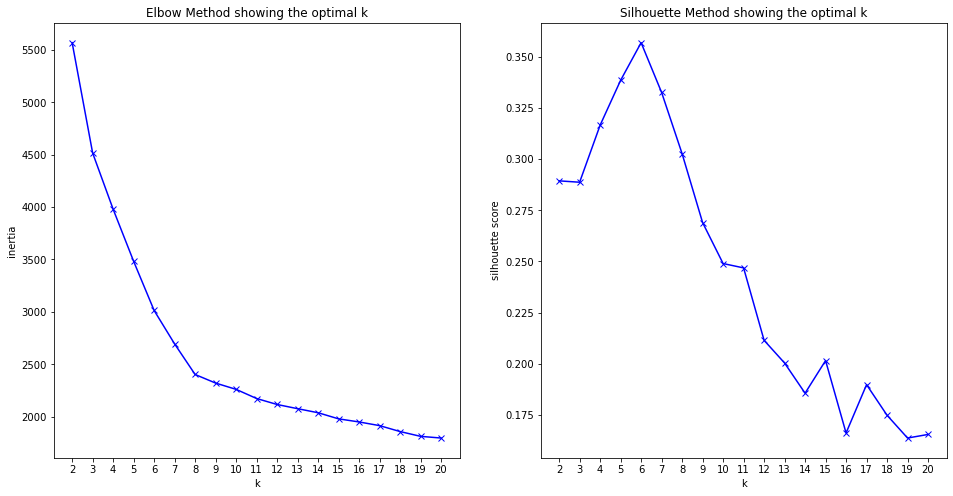

In [18]:
K = range(2, 21)
inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} neighbours! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1) #showing the progress of fitting
    kmeans.fit(whole_set_scaled_df)
    filename = "kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(whole_set_scaled_df, kmeans.predict(whole_set_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

There seems to be an elbow at **k=8**, but other than that the plot is quite smooth. 
There is another metric that will help us decide.

## Silouhette

There's a metric called **Silhouette Score** that also measures how similar is an observation is to its own cluster compared to other clusters. For the ith observation, the **Silhouette Score** is:

$$s_{K,L} = (b - a) / max(a,b) $$

Where:

a = mean intra-cluster distance (the average distance between i and every other observation in the cluster where i belongs)

$$ a = \frac{1}{n_{K}}\sum_{i,j\neq{i}}^{n_{K}}d(i,j)$$

b = mean **nearest-cluster** distance (the average distance between i and the observations of the nearest cluster that i is not part of it)

$$ b = \frac{1}{(n_{K}*n_{L})}\sum_{i}^{n_{K}}\sum_{j}^{n_{L}}d(i,j)$$

The silhouette score for the whole model is the **average of all the silhouette scores** of each instance.

$$ S = \frac{2}{N(N-1)}\sum_{c}s_{K,L}$$

Because we divide the substraction of (b-a) by the max of the two distances (which will always be b unless the observation has been wrongly assigned to a cluster it should not belong), we obtain a "normalized score", that ranges from -1 to 1, and that makes it easier to interpret.

The greater the Silouhette, the greater the separation between the clusters, In other words, the clusters will be more defined.

Here, we confirm that 3 is the best option, but we also notice that 5 a quite good - it meets the 'technical criteria' of having a better score than its predecessor (4), so if it falls within the range of our business demands - it looks like the best candidate.

# Loading the scaler and the best model

In [19]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 


In [20]:
scaler2 = load("scaler.pickle")
scaler2

StandardScaler()

In [21]:
best_model = load("kmeans_8.pickle")

C(N=3000,2)= 3000!/(2!(3000-2)!) = (3000*2999*2998!)/(2!*2998!)=
(3000*2999)/2! = (3000*2999)/2 = 1500*2999

In [22]:
best_model.predict(whole_set_scaled_df)

array([0, 1, 4, 3, 1, 0, 3, 0, 1, 1, 3, 4, 4, 1, 1, 5, 2, 6, 0, 1, 1, 2,
       4, 0, 2, 0, 6, 1, 4, 4, 7, 0, 6, 0, 3, 6, 0, 0, 0, 0, 3, 4, 2, 5,
       5, 4, 6, 2, 1, 1, 7, 7, 2, 3, 3, 1, 5, 2, 4, 2, 2, 2, 6, 4, 2, 3,
       2, 2, 1, 6, 2, 2, 0, 7, 1, 2, 1, 2, 2, 4, 2, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 1, 0, 6, 3, 1, 4, 1, 7, 1, 1, 7, 7, 2, 3, 3, 1, 5, 2, 4, 2,
       2, 2, 6, 4, 2, 3, 2, 2, 1, 6, 2, 2, 0, 7, 1, 2, 1, 2, 2, 4, 2, 3,
       2, 2, 1, 2, 2, 3, 2, 3, 1, 0, 6, 3, 1, 4, 1, 7, 2, 0, 2, 2, 6, 3,
       2, 0, 0, 1, 3, 2, 1, 0, 2, 5, 2, 5, 1, 5, 1, 2, 2, 1, 3, 5, 6, 0,
       7, 4, 1, 2, 3, 4, 0, 0, 4, 6, 7, 5, 0, 1, 4, 0, 1, 3, 1, 4, 6, 2,
       0, 1, 0, 6, 0, 1, 2, 3, 4, 1, 3, 4, 1, 6, 0, 2, 2, 2, 2, 6, 2, 1,
       4, 2, 6, 2, 4, 0, 2, 3, 2, 1, 2, 1, 2, 1, 0, 2, 3, 0, 4, 4, 2, 0,
       5, 2, 6, 5, 1, 2, 1, 1, 7, 3, 1, 5, 2, 1, 2, 0, 2, 2, 3, 2, 1, 1,
       2, 0, 3, 1, 4, 1, 7, 1, 3, 2, 0, 4, 6, 3, 1, 4, 0, 0, 3, 1, 1, 1,
       0, 6, 2, 2, 0, 2, 7, 2, 0, 1, 6, 1, 1, 1, 0,

#Gaussian Mixtures This method assumes that the data is grouped in such a way that resembles gaussian distributions.
This method has several parameters, the most importatn ones are:

The type of covariance matrix:
a. Full
b. Tied
c. Diagonal
d. Spherical
n_components: the number of clusters
init_params (control how to initzialize the centroids):
a. K-Means
b. Random

In [23]:
gmm = GaussianMixture(n_components=4, covariance_type='full')

In [24]:
gmm.fit(whole_set_scaled_df)

GaussianMixture(n_components=4)

In [25]:
ygmm_hat = gmm.predict(whole_set_scaled_df)
ygmm_hat

array([0, 1, 3, 1, 1, 0, 1, 0, 1, 1, 1, 3, 3, 1, 1, 3, 0, 2, 0, 1, 1, 0,
       3, 0, 0, 0, 2, 1, 3, 3, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 3, 0, 3,
       3, 3, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 3, 0, 0, 0, 2, 3, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 3, 0,
       0, 0, 2, 3, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 3, 1, 1, 0, 0, 0, 0, 2, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 3, 1, 3, 1, 0, 0, 1, 1, 3, 2, 0,
       1, 3, 1, 0, 1, 3, 0, 0, 3, 2, 1, 3, 0, 1, 3, 0, 1, 1, 1, 3, 2, 0,
       0, 1, 0, 2, 0, 1, 0, 1, 3, 1, 1, 3, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1,
       3, 0, 2, 0, 3, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 3, 3, 0, 0,
       3, 0, 2, 3, 1, 0, 1, 1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0, 3, 2, 1, 1, 3, 0, 0, 1, 1, 1, 1,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0,

In [26]:
whole_set_scaled_df["cluster_gaus_full"] = ygmm_hat
whole_set_scaled_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_KMeans,cluster_gaus_full
0,-0.556691,0.598239,0.672181,-0.491641,1.320872,-0.292743,-0.038574,-0.230137,-0.942883,6,0
1,0.976657,1.281999,0.361757,-0.469691,-1.042073,-0.077030,-0.387415,1.312121,0.477670,3,1
2,-0.143132,-1.636020,-0.957914,-0.580732,1.921245,0.952540,-0.584710,-1.830126,-1.618250,1,3
3,-1.822817,0.574163,-0.152762,0.366996,0.352089,-0.292743,1.162355,0.887381,2.750403,4,1
4,1.498378,-0.186641,1.148597,-0.376726,-0.613284,-0.292594,-0.807168,1.452326,-0.261423,3,1


In [26]:
## Assesing the effect of the parameters

In [27]:
gmm2 = GaussianMixture(n_components=6, covariance_type='tied') 
#different tipe of gaussin slope
gmm2.fit(whole_set_scaled_df)

GaussianMixture(covariance_type='tied', n_components=6)

In [28]:
ygmm_hat2 = gmm2.predict(whole_set_scaled_df)
ygmm_hat2

array([2, 4, 3, 1, 4, 2, 1, 2, 4, 4, 1, 3, 3, 4, 4, 4, 2, 5, 2, 4, 4, 2,
       3, 2, 2, 2, 5, 4, 3, 3, 0, 2, 5, 2, 1, 5, 2, 2, 2, 2, 1, 3, 2, 4,
       4, 3, 5, 2, 4, 4, 0, 0, 2, 1, 1, 4, 4, 2, 3, 2, 2, 2, 5, 3, 2, 1,
       2, 2, 4, 5, 2, 2, 2, 0, 4, 2, 4, 2, 2, 3, 2, 1, 2, 2, 4, 2, 2, 1,
       2, 1, 4, 2, 5, 1, 4, 3, 4, 0, 4, 4, 0, 0, 2, 1, 1, 4, 4, 2, 3, 2,
       2, 2, 5, 3, 2, 1, 2, 2, 4, 5, 2, 2, 2, 0, 4, 2, 4, 2, 2, 3, 2, 1,
       2, 2, 4, 2, 2, 1, 2, 1, 4, 2, 5, 1, 4, 3, 4, 0, 2, 2, 2, 2, 5, 1,
       2, 2, 2, 4, 1, 2, 4, 2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 1, 4, 5, 2,
       0, 3, 4, 2, 1, 3, 2, 2, 3, 5, 0, 4, 2, 4, 3, 2, 4, 1, 4, 3, 5, 2,
       2, 4, 2, 5, 2, 4, 2, 1, 3, 4, 1, 3, 4, 5, 2, 2, 2, 2, 2, 5, 2, 4,
       3, 2, 5, 2, 3, 2, 2, 1, 2, 4, 2, 4, 2, 4, 2, 2, 1, 2, 3, 3, 2, 2,
       4, 2, 5, 4, 4, 2, 4, 4, 0, 1, 4, 4, 2, 4, 2, 2, 2, 2, 1, 2, 4, 4,
       2, 2, 1, 4, 3, 4, 0, 4, 1, 2, 2, 3, 5, 1, 4, 3, 2, 2, 1, 4, 4, 4,
       2, 5, 2, 2, 2, 2, 0, 2, 2, 4, 5, 4, 4, 4, 2,

In [29]:
whole_set_scaled_df["cluster_tied"] = ygmm_hat2
whole_set_scaled_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_KMeans,cluster_gaus_full,cluster_tied
0,-0.556691,0.598239,0.672181,-0.491641,1.320872,-0.292743,-0.038574,-0.230137,-0.942883,6,0,2
1,0.976657,1.281999,0.361757,-0.469691,-1.042073,-0.077030,-0.387415,1.312121,0.477670,3,1,4
2,-0.143132,-1.636020,-0.957914,-0.580732,1.921245,0.952540,-0.584710,-1.830126,-1.618250,1,3,3
3,-1.822817,0.574163,-0.152762,0.366996,0.352089,-0.292743,1.162355,0.887381,2.750403,4,1,1
4,1.498378,-0.186641,1.148597,-0.376726,-0.613284,-0.292594,-0.807168,1.452326,-0.261423,3,1,4


In [30]:
gmm3 = GaussianMixture(n_components=6, covariance_type='diag')
gmm3.fit(whole_set_scaled_df)

GaussianMixture(covariance_type='diag', n_components=6)

In [31]:
ygmm_hat3 = gmm3.predict(whole_set_scaled_df)
ygmm_hat3

array([5, 2, 4, 1, 2, 5, 1, 5, 2, 2, 1, 4, 4, 2, 2, 0, 5, 4, 5, 2, 2, 5,
       4, 5, 5, 5, 4, 2, 4, 4, 3, 5, 4, 5, 1, 4, 5, 5, 5, 5, 1, 4, 5, 0,
       0, 4, 4, 5, 2, 2, 3, 3, 5, 1, 1, 2, 0, 5, 4, 5, 5, 5, 4, 4, 5, 1,
       5, 5, 2, 4, 5, 5, 5, 3, 2, 5, 2, 5, 5, 4, 5, 1, 5, 5, 2, 5, 5, 1,
       5, 1, 2, 5, 0, 1, 2, 4, 2, 3, 2, 2, 3, 3, 5, 1, 1, 2, 0, 5, 4, 5,
       5, 5, 4, 4, 5, 1, 5, 5, 2, 4, 5, 5, 5, 3, 2, 5, 2, 5, 5, 4, 5, 1,
       5, 5, 2, 5, 5, 1, 5, 1, 2, 5, 0, 1, 2, 4, 2, 3, 5, 5, 5, 5, 4, 1,
       5, 5, 5, 2, 1, 5, 2, 5, 5, 0, 5, 0, 2, 0, 2, 5, 5, 2, 1, 0, 4, 5,
       3, 4, 2, 5, 1, 4, 5, 5, 4, 4, 3, 0, 5, 2, 4, 5, 2, 1, 2, 4, 4, 5,
       5, 2, 5, 4, 5, 2, 5, 1, 4, 2, 1, 4, 2, 4, 5, 5, 5, 5, 5, 4, 5, 2,
       4, 5, 4, 5, 4, 5, 5, 1, 5, 2, 5, 2, 5, 2, 5, 5, 1, 5, 4, 4, 5, 5,
       0, 5, 4, 0, 2, 5, 2, 2, 3, 1, 2, 0, 5, 2, 5, 5, 5, 5, 1, 5, 2, 2,
       5, 5, 1, 2, 4, 2, 3, 2, 1, 5, 5, 4, 4, 1, 2, 4, 5, 5, 1, 2, 2, 2,
       5, 4, 5, 5, 5, 5, 3, 5, 5, 2, 4, 2, 2, 2, 5,

In [32]:
whole_set_scaled_df["cluster_diag"] = ygmm_hat3
whole_set_scaled_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_KMeans,cluster_gaus_full,cluster_tied,cluster_diag
0,-0.556691,0.598239,0.672181,-0.491641,1.320872,-0.292743,-0.038574,-0.230137,-0.942883,6,0,2,5
1,0.976657,1.281999,0.361757,-0.469691,-1.042073,-0.077030,-0.387415,1.312121,0.477670,3,1,4,2
2,-0.143132,-1.636020,-0.957914,-0.580732,1.921245,0.952540,-0.584710,-1.830126,-1.618250,1,3,3,4
3,-1.822817,0.574163,-0.152762,0.366996,0.352089,-0.292743,1.162355,0.887381,2.750403,4,1,1,1
4,1.498378,-0.186641,1.148597,-0.376726,-0.613284,-0.292594,-0.807168,1.452326,-0.261423,3,1,4,2


In [38]:
cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

In [39]:
gmm4 = GaussianMixture(n_components=6, covariance_type='spherical')
gmm4.fit(whole_set_scaled_df[cols])

filename = "gmm4_" + str(6) + ".pickle" # Path with filename
with open(filename, "wb") as file:
    pickle.dump(gmm4,file)

In [42]:
ygmm_hat4 = gmm4.predict(whole_set_scaled_df[cols])
ygmm_hat4

array([0, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0, 5, 0, 4, 1, 2, 0, 1,
       1, 0, 1, 2, 4, 0, 1, 1, 3, 1, 4, 0, 2, 4, 0, 0, 0, 0, 2, 1, 1, 5,
       5, 1, 4, 1, 0, 0, 3, 3, 0, 2, 2, 0, 5, 0, 1, 0, 1, 0, 4, 1, 0, 2,
       2, 0, 0, 1, 0, 1, 1, 3, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2,
       1, 2, 0, 2, 4, 2, 0, 1, 0, 3, 0, 0, 3, 3, 0, 2, 2, 0, 5, 0, 1, 0,
       1, 0, 4, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 3, 0, 0, 0, 0, 1, 1, 1, 2,
       1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 4, 2, 0, 1, 0, 3, 1, 1, 0, 1, 4, 2,
       0, 2, 1, 0, 2, 0, 0, 0, 0, 5, 2, 5, 0, 5, 0, 1, 0, 0, 2, 5, 4, 2,
       3, 1, 0, 0, 2, 1, 1, 0, 1, 4, 3, 5, 2, 0, 1, 0, 0, 2, 0, 1, 4, 0,
       1, 0, 0, 4, 0, 0, 0, 2, 1, 0, 2, 1, 2, 4, 0, 0, 0, 1, 1, 4, 0, 0,
       1, 0, 4, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1,
       5, 0, 0, 5, 0, 0, 0, 0, 3, 2, 0, 5, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0,
       0, 1, 2, 0, 1, 0, 3, 0, 2, 3, 0, 1, 4, 2, 0, 1, 0, 2, 2, 0, 0, 0,
       2, 4, 1, 1, 2, 0, 3, 0, 1, 0, 4, 0, 0, 0, 1,

In [43]:
whole_set_scaled_df["cluster_spheric"] = ygmm_hat4
whole_set_scaled_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_KMeans,cluster_gaus_full,cluster_tied,cluster_diag,cluster_spheric
0,-0.556691,0.598239,0.672181,-0.491641,1.320872,-0.292743,-0.038574,-0.230137,-0.942883,6,0,2,5,0
1,0.976657,1.281999,0.361757,-0.469691,-1.042073,-0.077030,-0.387415,1.312121,0.477670,3,1,4,2,0
2,-0.143132,-1.636020,-0.957914,-0.580732,1.921245,0.952540,-0.584710,-1.830126,-1.618250,1,3,3,4,1
3,-1.822817,0.574163,-0.152762,0.366996,0.352089,-0.292743,1.162355,0.887381,2.750403,4,1,1,1,2
4,1.498378,-0.186641,1.148597,-0.376726,-0.613284,-0.292594,-0.807168,1.452326,-0.261423,3,1,4,2,0


In [36]:
# Agglomerative clustering

In [44]:
aglo = AgglomerativeClustering(distance_threshold=10, n_clusters=None)
#aglo.fit(X_scaled_df)
cluster_aglo = aglo.fit_predict(whole_set_scaled_df)
cluster_aglo

array([ 9, 12,  0,  6, 12,  7,  6,  7,  3,  3,  6,  0,  0, 12,  3,  4,  1,
        2,  7,  3, 12,  1,  0,  9,  1,  7,  2,  3,  0,  0,  5,  9,  2,  9,
        6,  2,  9,  9,  9,  9,  6,  0,  1,  4,  4,  0,  2,  1, 12, 12,  5,
        5,  1,  6,  6,  3, 11,  8,  0,  8,  1,  8,  2,  0,  8,  6,  1,  8,
       12,  2,  8,  1,  9,  5, 12,  8, 12,  8,  1,  0,  1,  6,  1,  8,  3,
        8,  8,  6,  1,  6, 12,  7, 11,  6, 12,  0,  3,  5, 12, 12,  5,  5,
        1,  6,  6,  3, 11,  8,  0,  8,  1,  8,  2,  0,  8,  6,  1,  8, 12,
        2,  8,  1,  9,  5, 12,  8, 12,  8,  1,  0,  1,  6,  1,  8,  3,  8,
        8,  6,  1,  6, 12,  7, 11,  6, 12,  0,  3,  5,  1,  9,  8,  1,  2,
        6,  8,  7,  7, 12,  6,  8,  3,  9,  8,  4,  1,  4,  3,  4,  3,  1,
        8, 12,  6,  4,  2,  7,  5,  0, 12,  8,  6,  0,  7,  9,  0,  2,  5,
        4,  7,  3,  0,  9, 12,  6, 12,  0,  2,  8,  7, 12,  9,  2,  9,  3,
        8,  6,  0,  3,  6,  0,  3,  2,  9,  8,  8,  1,  1,  2,  8,  3,  0,
        1,  2,  8,  0,  7

In [45]:
whole_set_scaled_df["cluster_aglo"] = cluster_aglo
whole_set_scaled_df.head(10)


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_KMeans,cluster_gaus_full,cluster_tied,cluster_diag,cluster_spheric,cluster_aglo
0,-0.556691,0.598239,0.672181,-0.491641,1.320872,-0.292743,-0.038574,-0.230137,-0.942883,6,0,2,5,0,9
1,0.976657,1.281999,0.361757,-0.469691,-1.042073,-0.077030,-0.387415,1.312121,0.477670,3,1,4,2,0,12
2,-0.143132,-1.636020,-0.957914,-0.580732,1.921245,0.952540,-0.584710,-1.830126,-1.618250,1,3,3,4,1,0
3,-1.822817,0.574163,-0.152762,0.366996,0.352089,-0.292743,1.162355,0.887381,2.750403,4,1,1,1,2,6
4,1.498378,-0.186641,1.148597,-0.376726,-0.613284,-0.292594,-0.807168,1.452326,-0.261423,3,1,4,2,0,12
5,-1.103861,-0.595934,0.426736,-0.460652,-0.060668,-0.291899,-0.496070,-0.939410,0.378914,6,0,2,5,2,7
6,-0.225844,0.993086,-0.004195,0.053238,1.354984,-0.292330,0.636234,1.468821,1.574299,4,1,1,1,2,6
7,-1.167485,0.049304,0.417875,-0.569112,-1.134516,-0.292649,-0.616163,-0.333229,0.855144,6,0,2,5,2,7
8,-0.429442,1.517945,1.346489,-0.177883,-1.172635,-0.291566,-0.513226,0.442024,-0.198736,3,1,4,2,0,3
9,-1.002062,0.891967,-0.021031,-0.157225,-0.122069,-0.236808,-0.676210,0.380168,-0.892034,3,1,4,2,0,3


In [46]:
whole_set_scaled_df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'cluster_KMeans',
       'cluster_gaus_full', 'cluster_tied', 'cluster_diag', 'cluster_spheric',
       'cluster_aglo'],
      dtype='object')

In [47]:
#(whole_set_scaled_df.loc[(whole_set_scaled_df['cluster_KMeans'] == 1)]).head(10)

whole_set_scaled_df=whole_set_scaled_df.drop(columns = ['cluster_KMeans',
       'cluster_gaus_full', 'cluster_tied', 'cluster_diag', 
       'cluster_aglo'], axis=1).reset_index(drop=True)
whole_set_scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_spheric
0,-0.556691,0.598239,0.672181,-0.491641,1.320872,-0.292743,-0.038574,-0.230137,-0.942883,0
1,0.976657,1.281999,0.361757,-0.469691,-1.042073,-0.077030,-0.387415,1.312121,0.477670,0
2,-0.143132,-1.636020,-0.957914,-0.580732,1.921245,0.952540,-0.584710,-1.830126,-1.618250,1
3,-1.822817,0.574163,-0.152762,0.366996,0.352089,-0.292743,1.162355,0.887381,2.750403,2
4,1.498378,-0.186641,1.148597,-0.376726,-0.613284,-0.292594,-0.807168,1.452326,-0.261423,0
...,...,...,...,...,...,...,...,...,...,...
555,0.976657,0.843815,0.688425,0.116506,-1.154847,-0.292665,0.979356,-0.135292,-0.709545,0
556,0.633086,0.694543,0.759017,3.174026,-1.105180,-0.292743,0.155862,-0.894050,1.571530,3
557,-0.047696,-1.005227,-0.878167,0.004173,0.468070,-0.282876,-0.450321,-1.871363,-0.510753,1
558,-0.314918,0.742695,1.196446,-0.194669,-0.589405,-0.292693,-0.762562,-0.386837,1.161034,2


In [48]:
all_songs_clustered=pd.concat([whole_set_scaled_df, whole_set_copy['set']], axis=1).reset_index(drop=True)
all_songs_clustered

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_spheric,set
0,-0.556691,0.598239,0.672181,-0.491641,1.320872,-0.292743,-0.038574,-0.230137,-0.942883,0,N
1,0.976657,1.281999,0.361757,-0.469691,-1.042073,-0.077030,-0.387415,1.312121,0.477670,0,N
2,-0.143132,-1.636020,-0.957914,-0.580732,1.921245,0.952540,-0.584710,-1.830126,-1.618250,1,N
3,-1.822817,0.574163,-0.152762,0.366996,0.352089,-0.292743,1.162355,0.887381,2.750403,2,N
4,1.498378,-0.186641,1.148597,-0.376726,-0.613284,-0.292594,-0.807168,1.452326,-0.261423,0,N
...,...,...,...,...,...,...,...,...,...,...,...
555,0.976657,0.843815,0.688425,0.116506,-1.154847,-0.292665,0.979356,-0.135292,-0.709545,0,H
556,0.633086,0.694543,0.759017,3.174026,-1.105180,-0.292743,0.155862,-0.894050,1.571530,3,H
557,-0.047696,-1.005227,-0.878167,0.004173,0.468070,-0.282876,-0.450321,-1.871363,-0.510753,1,H
558,-0.314918,0.742695,1.196446,-0.194669,-0.589405,-0.292693,-0.762562,-0.386837,1.161034,2,H


We used  this kind of line of code #(whole_set_scaled_df.loc[(whole_set_scaled_df['cluster_KMeans'] == 1)]).head(10)
to see which songs belongs to each cluster and if they sound similar. We spread it within the group. Each person had 2 clustering models to test. And we decided to go with the gaussian, spherical distribution, with 6 as amount of clusters.